In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Program Files\Anaconda2\envs\PythonEnvironment\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.6+ KB


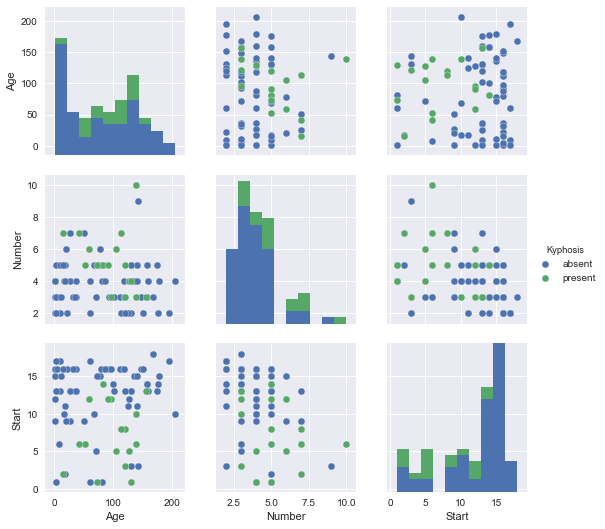

In [6]:
sns.pairplot(df, hue='Kyphosis')

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Kyphosis',axis=1),df['Kyphosis'],test_size=0.3,random_state=101)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
clf = DecisionTreeClassifier()

In [12]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [13]:
preds = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix

In [15]:
print(confusion_matrix(y_test,preds))

[[12  5]
 [ 6  2]]


In [16]:
print(classification_report(y_test,preds))

             precision    recall  f1-score   support

     absent       0.67      0.71      0.69        17
    present       0.29      0.25      0.27         8

avg / total       0.54      0.56      0.55        25



In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rfc = RandomForestClassifier(n_estimators=200)

In [19]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [20]:
prediction = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test,prediction))
print('\n')
print(classification_report(y_test, prediction))

[[17  0]
 [ 6  2]]


             precision    recall  f1-score   support

     absent       0.74      1.00      0.85        17
    present       1.00      0.25      0.40         8

avg / total       0.82      0.76      0.71        25

